<a href="https://colab.research.google.com/github/shellgav/Analisis_ventas/blob/main/Final_Proyecto_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***ÁNALISIS DE VENTAS HISTÓRICAS*** 📈

***Proyecto Final del Módulo N°2 - Ciencias de Datos - Equipo N°1 Cohorte 15*** \\
Por: \\
***Aarón Mateo Tocora Jiménez*** \\
***Shelly Mayra Alejandra Gaviria Botina*** \\
**Felipe Andres Mejía Carrillo** \\
***Joel Valencia***

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### INFORME EXPLORATORIO ###

# Instalar ydata-profiling
!pip install ydata-profiling -q

# Importar las librerías
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Leer el archivo csv
df = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de Features data set.csv")

# Mostrar información básica del DataFrame
print(df)
df.info()

# Generar el informe de perfil
report = ProfileReport(df, sort=None, html={'style': {'full_width': True}})
report

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 44.4 MB/s eta 0:00:00
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05      

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

#Para la manipulación de datos se importaron las siguientes librerias:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm

Estos nos permitirán dar lectura al formato de los datos, en este caso (csv), almacenando los Datframe en variables; Features, sales y stores, para hacer más práctico su llamado a futuro:

In [ ]:
# Leer archivos csv's
features= pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de Features data set.csv")
sales = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de sales data-set.csv")
stores = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de stores data-set.csv")

***INFORMACIÓN DE DATAFRAMES***

Utilizamos features.info (), sales.info () y stores.info (), para visualizar y conocer su contenido

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8146 entries, 0 to 8145
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8146 non-null   int64  
 1   Date          8146 non-null   object 
 2   Temperature   8146 non-null   float64
 3   Fuel_Price    8146 non-null   float64
 4   MarkDown1     3989 non-null   float64
 5   MarkDown2     2880 non-null   float64
 6   MarkDown3     3574 non-null   float64
 7   MarkDown4     3424 non-null   float64
 8   MarkDown5     4006 non-null   float64
 9   CPI           7562 non-null   float64
 10  Unemployment  7562 non-null   float64
 11  IsHoliday     8146 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 708.1+ KB


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


***LIMPIEZA DE DATOS***

Empezando así la limpieza y modificación que nos permita una mejor precisión en el análisis de datos, iniciando por el Dataframe “Sales” y “Future”, con el manejo del formato de la variable “Date”:

In [ ]:
# DataFrame "Sales"
# Modificación del formato de la variable "Date" como corresponde
sales['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y') # DataFrame "Sales"
sales['Date'] = pd.to_datetime(sales['Date'])

# DataFrame "Features"
features['Date']=pd.to_datetime(sales['Date'], format='%d/%m/%Y')  # DataFrame "Features"
features['Date'] = pd.to_datetime(sales['Date'])

# Asignación del número de semana correspondiente a cada fecha en el DataFrame "Features"
features['Week'] = (features['Date'] - features['Date'].min()).dt.days // 7 + 1
#features.head()
"""permitiendo su consistencia para el tipo de dato que se utilizará para un manejo uniforme
y correcto que nos permitirá más adelante calcular y combinar datos en los Dataframe."""

# Eliminar todos los registros con fecha posterior al "2012-10-26", ya que las ventas solo están registradas hasta esa fecha.
features = features.drop(features[features['Date'] > '2012-10-26'].index)  # DataFrame "Features"
#features.tail()

""" se realizaron verificaciones para identificar valores nulos y duplicados en los DataFrames Features, Sales y Stores
Priorizando mantener la integridad de los datos, evitando sesgos y errores en los resultados de análisis """

# Verificación de valores nulos
print("\nVerificación de valores nulos:\n", features.isnull().sum())
# Verificación de valores duplicados
print("\nVerificación de valores duplicados :\n ", features.duplicated().sum())

# Verificación de valores nulos
print("\nVerificación de valores nulos:\n", sales.isnull().sum())
# Verificación de valores duplicados
print("\nVerificación de valores duplicados :\n ", sales.duplicated().sum())

# Verificación de valores nulos
print("\nVerificación de valores nulos:\n", stores.isnull().sum())
# Verificación de valores duplicados
print("\nVerificación de valores duplicados :\n ", stores.duplicated().sum())







Verificación de valores nulos:
 Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
Week               0
dtype: int64

Verificación de valores duplicados :
  0

Verificación de valores nulos:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

Verificación de valores duplicados :
  0

Verificación de valores nulos:
 Store    0
Type     0
Size     0
dtype: int64

Verificación de valores duplicados :
  0


***VISUALIZACIÓN DE ANÁLISIS ESTADÍSTICOS***

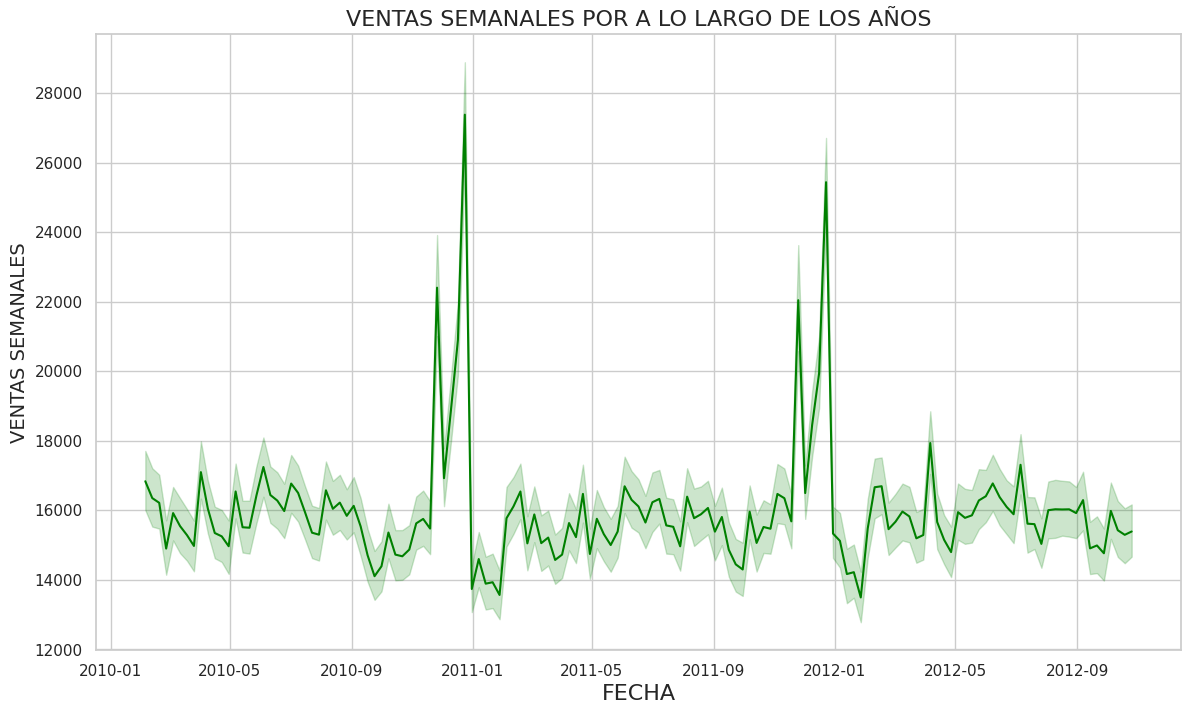

In [ ]:
# Análisis DataFrame "Sales"
# Configuración general de los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(14, 8))
sns.lineplot(data = sales, x='Date', y='Weekly_Sales', color='green')

# Añadir títulos y etiquetas
plt.title('VENTAS SEMANALES POR A LO LARGO DE LOS AÑOS', fontsize=16)
plt.xlabel('FECHA',  fontsize=16)
plt.ylabel('VENTAS SEMANALES', fontsize=14)

# Mostrar el gráfico
plt.show()

Se analiza desde un periodo de 2010 al año 2012, donde se evidencia un pico de crecimiento en los meses de 2010, 09 al año 2011,01 al igual que en el año 2011.09 al 2012,01, lo cual nos indica un aumento de ventas en vísperas de año, por otro lado, se evidencia un incremento gradual de ventas al largo de los tres años, indicando una sostenibilidad en ventas del supermercado.

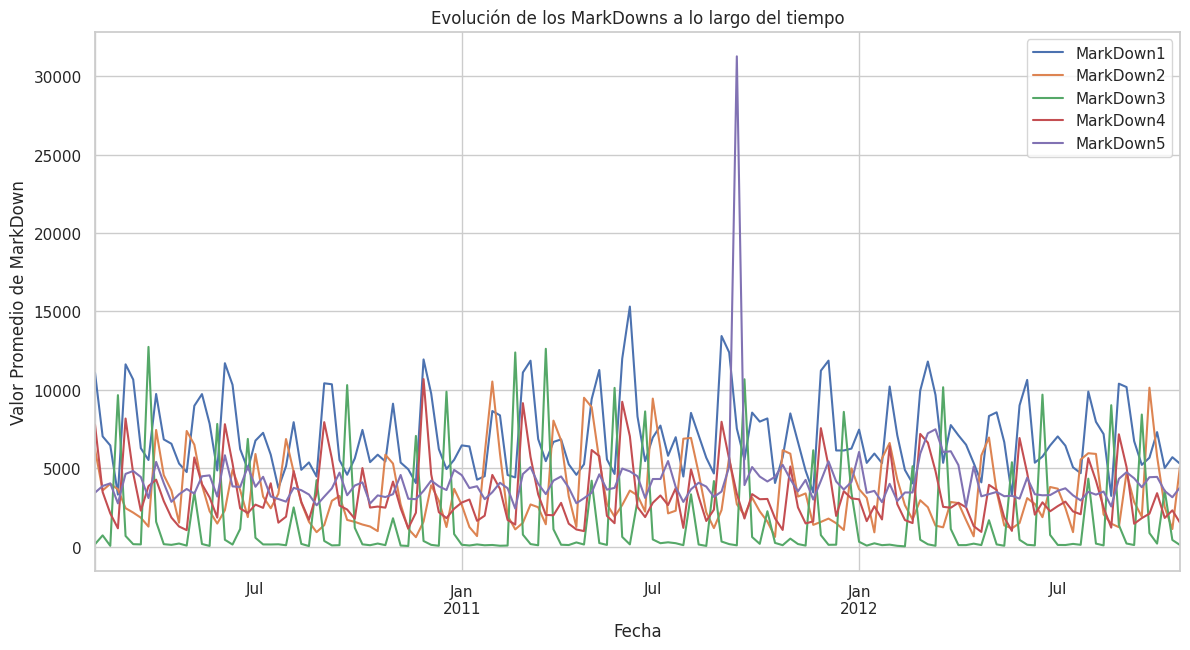

In [ ]:

# Configuración general de los gráficos
sns.set(style="whitegrid")

# Extraer el año para facilitar la comparación anual
features['Year'] = features['Date'].dt.year

# Evolución de los descuentos a lo largo del tiempo
plt.figure(figsize=(14, 7))
features.groupby('Date').mean()[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].plot(ax=plt.gca())
plt.title('Evolución de los MarkDowns a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor Promedio de MarkDown')
plt.legend(loc='upper right')
plt.show()



Teniendo en cuenta las promociones realizadas se observa un patrón recurrente en ciertas fechas del año que pueden coincidir con descuentos en fechas especiales para fomentar las ventas en el consumidor.  

Cada Markdown da a conocer un patrón de descuentos lo cual nos indica que algunos productos podrían tener promociones más frecuentes o de mayor tamaño, esto varía según el artículo, por lo cual se evidencia que se están ajustando los precios en forma del mercado o su competencia, pero sin una estrategia.

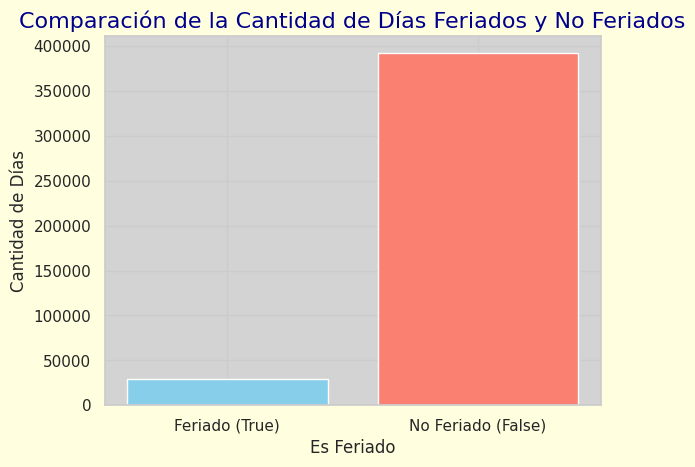

In [ ]:

# Cargar los datasets
df = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de sales data-set.csv")

# Contar la cantidad de días feriados y no feriados
holiday_count = df['IsHoliday'].value_counts()

# Crear un DataFrame con los resultados para graficar
holiday_df = pd.DataFrame({
    'IsHoliday': ['Feriado (True)', 'No Feriado (False)'],
    'Count': [holiday_count[True], holiday_count[False]]
})

# Crear la figura y el eje
fig, ax = plt.subplots()

# Cambiar el color de fondo de la figura y del gráfico
fig.patch.set_facecolor('lightyellow')
ax.set_facecolor('lightgrey')

# Crear la gráfica de barras con colores personalizados
bars = ax.bar(holiday_df['IsHoliday'], holiday_df['Count'], color=['skyblue', 'salmon'])

# Añadir título
ax.set_title('Comparación de la Cantidad de Días Feriados y No Feriados', color='darkblue', fontsize=16)

# Añadir etiquetas de los ejes
ax.set_xlabel('Es Feriado', fontsize=12)
ax.set_ylabel('Cantidad de Días', fontsize=12)

# Mostrar la gráfica
plt.show()

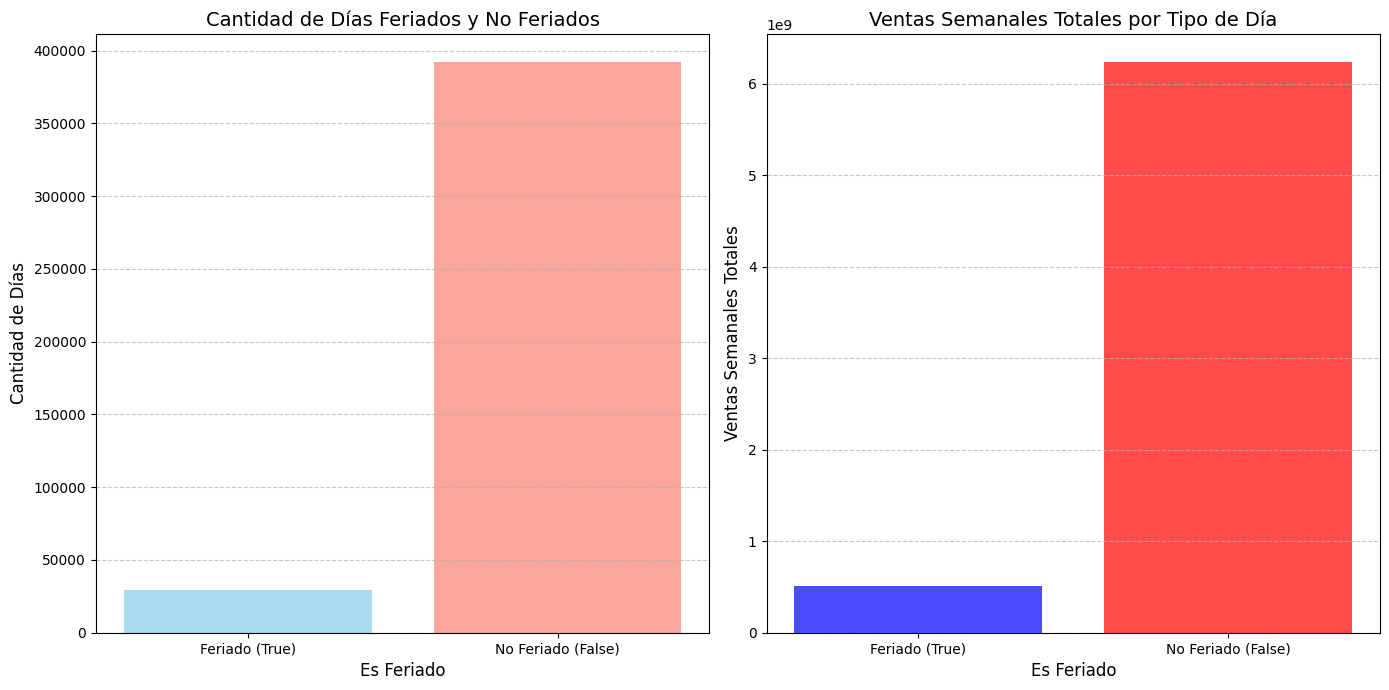

In [ ]:
sales = pd.read_csv("/content/drive/MyDrive/Ciencia De Datos/Modulo 2./salesdata-set.csv")
stores = pd.read_csv("/content/drive/MyDrive/Ciencia De Datos/Modulo 2./Copia de stores data-set.csv")

# Contar la cantidad de días feriados y no feriados
holiday_count = sales['IsHoliday'].value_counts()

# Calcular las ventas totales para días feriados y no feriados
sales_by_holiday = sales.groupby('IsHoliday')['Weekly_Sales'].sum()

# Crear un DataFrame con los resultados para graficar
holiday_df = pd.DataFrame({
    'IsHoliday': ['Feriado (True)', 'No Feriado (False)'],
    'Count': [holiday_count[True], holiday_count[False]],
    'Weekly_Sales': [sales_by_holiday[True], sales_by_holiday[False]]
})

# Crear la figura y los ejes para dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Crear el gráfico de barras para la cantidad de días
ax1.bar(holiday_df['IsHoliday'], holiday_df['Count'], color=['skyblue', 'salmon'], alpha=0.7)
ax1.set_xlabel('Es Feriado', fontsize=12)
ax1.set_ylabel('Cantidad de Días', fontsize=12)
ax1.set_title('Cantidad de Días Feriados y No Feriados', fontsize=14)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Crear el gráfico de barras para las ventas semanales
ax2.bar(holiday_df['IsHoliday'], holiday_df['Weekly_Sales'], color=['blue', 'red'], alpha=0.7)
ax2.set_xlabel('Es Feriado', fontsize=12)
ax2.set_ylabel('Ventas Semanales Totales', fontsize=12)
ax2.set_title('Ventas Semanales Totales por Tipo de Día', fontsize=14)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño de los gráficos
plt.tight_layout()
plt.show()

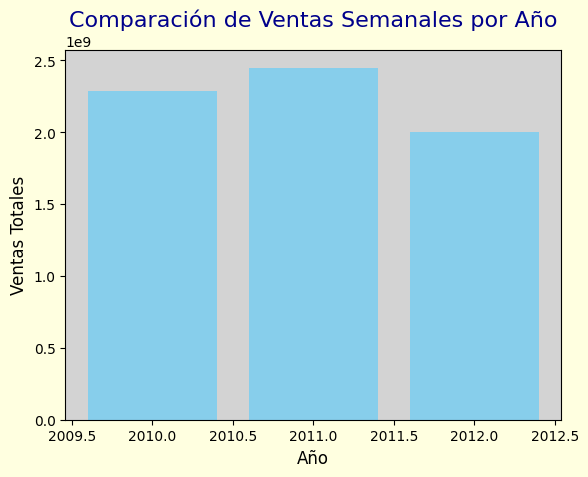

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extraer el año de la columna Date
df['Year'] = df['Date'].dt.year

# Agrupar las ventas semanales por año
sales_by_year = df.groupby('Year')['Weekly_Sales'].sum().reset_index()

# Crear la figura y el eje
fig, ax = plt.subplots()

# Cambiar el color del fondo de la figura y del gráfico
fig.patch.set_facecolor('lightyellow')
ax.set_facecolor('lightgrey')

# Crear la gráfica de barras
bars = ax.bar(sales_by_year['Year'], sales_by_year['Weekly_Sales'], color='skyblue')

# Añadir título
ax.set_title('Comparación de Ventas Semanales por Año', color='darkblue', fontsize=16)

# Añadir etiquetas de los ejes
ax.set_xlabel('Año', fontsize=12)
ax.set_ylabel('Ventas Totales', fontsize=12)

# Mostrar la gráfica
plt.show()

Se observa una disminución en el año 2012 comparadas con el anterior año (2011), mostrando un incremento en el año 2010 y 2011, alcanzando sus mayores ventas en el año 201, aunque se observa una disminución parece no afectar la estabilidad de las ventas durante este tiempo.  

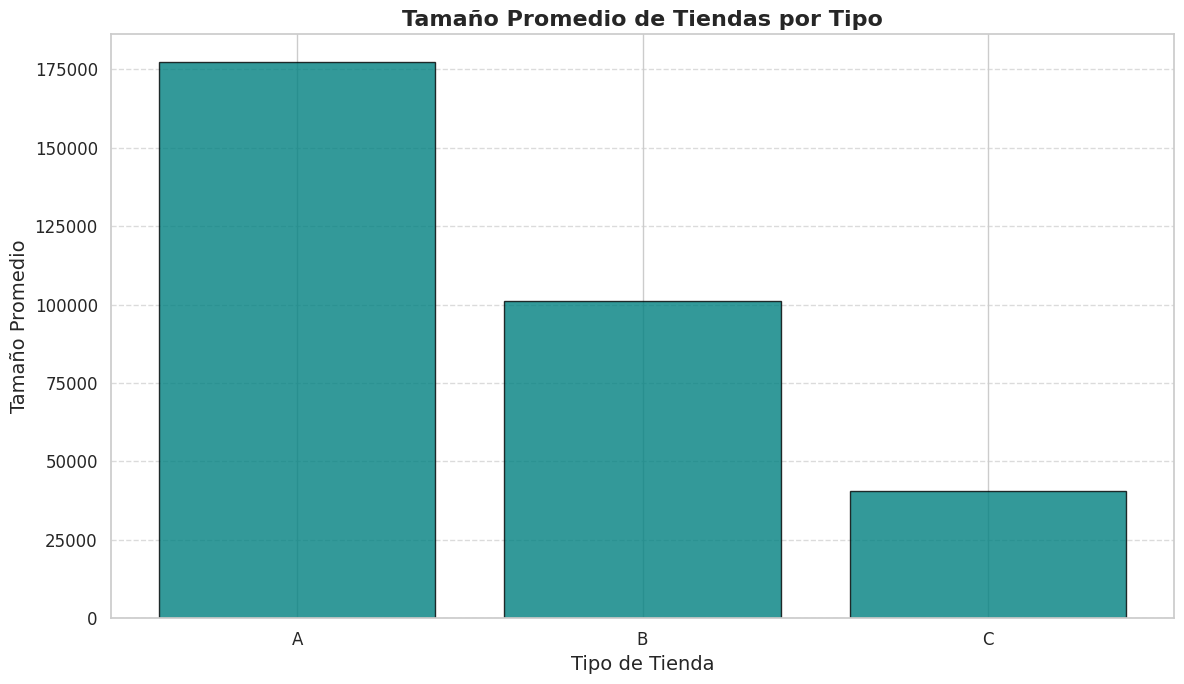

In [ ]:
stores = pd.read_csv("/content/drive/MyDrive/Trabajo educamas final 2/Copia de stores data-set.csv")

# Agrupar el tamaño promedio de las tiendas por tipo
size_by_type = stores.groupby('Type')['Size'].mean()

# Crear la gráfica
plt.figure(figsize=(12, 7))
bars = plt.bar(size_by_type.index, size_by_type.values, color='teal', edgecolor='black', alpha=0.8)


plt.xlabel('Tipo de Tienda', fontsize=14)
plt.ylabel('Tamaño Promedio', fontsize=14)
plt.title('Tamaño Promedio de Tiendas por Tipo', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

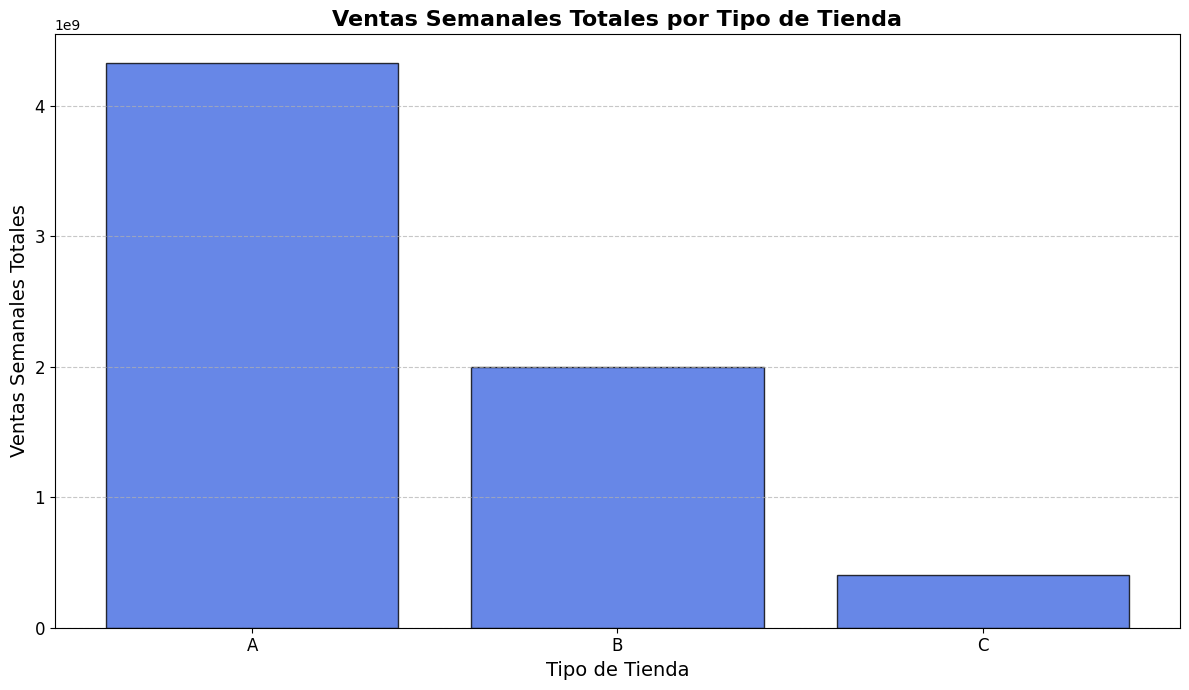

In [ ]:
sales = pd.read_csv("/content/drive/MyDrive/Ciencia De Datos/Modulo 2./salesdata-set.csv")
stores = pd.read_csv("/content/drive/MyDrive/Ciencia De Datos/Modulo 2./Copia de stores data-set.csv")


# Unir los datasets de ventas y tiendas en base a la columna 'Store'
merged_data = pd.merge(sales, stores, on='Store')

# Agrupar las ventas semanales por tipo de tienda
weekly_sales_by_type = merged_data.groupby('Type')['Weekly_Sales'].sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
bars = plt.bar(weekly_sales_by_type.index, weekly_sales_by_type.values, color='royalblue', edgecolor='black', alpha=0.8)

# Añadir etiquetas y títulos
plt.xlabel('Tipo de Tienda', fontsize=14)
plt.ylabel('Ventas Semanales Totales', fontsize=14)
plt.title('Ventas Semanales Totales por Tipo de Tienda', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()
